In [1]:
import pandas as pd

# Load dataset
file_path = "traffic_accident_data_50.csv"  # Replace with your dataset path
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Accident_ID,Date,Time,Latitude,Longitude,Weather_Condition,Road_Condition,Severity,Accident_Type
0,1,2024-01-01,11:11,48.124515,-71.119737,Snow,Snow-covered,3,Head-on
1,2,2024-01-02,07:44,41.334983,-82.785598,Fog,Icy,1,Head-on
2,3,2024-01-03,15:05,47.304996,-116.721316,Snow,Dry,3,Side collision
3,4,2024-01-04,09:40,29.014655,-76.948558,Clear,Icy,4,Single vehicle
4,5,2024-01-05,02:58,35.939402,-120.035263,Storm,Icy,4,Rollover


In [3]:
# Convert 'Date' and 'Time' into a single 'Start_Time' column
df['Start_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Now you can extract features like Hour, Day, and Month
df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

df.head()

,Accident_ID,Date,Time,Latitude,Longitude,Weather_Condition,Road_Condition,Severity,Accident_Type,Start_Time,Hour,Day,Month
0,1,2024-01-01,11:11,48.124515,-71.119737,Snow,Snow-covered,3,Head-on,2024-01-01 11:11:00,11,Monday,January
1,2,2024-01-02,07:44,41.334983,-82.785598,Fog,Icy,1,Head-on,2024-01-02 07:44:00,7,Tuesday,January
2,3,2024-01-03,15:05,47.304996,-116.721316,Snow,Dry,3,Side collision,2024-01-03 15:05:00,15,Wednesday,January
3,4,2024-01-04,09:40,29.014655,-76.948558,Clear,Icy,4,Single vehicle,2024-01-04 09:40:00,9,Thursday,January
4,5,2024-01-05,02:58,35.939402,-120.035263,Storm,Icy,4,Rollover,2024-01-05 02:58:00,2,Friday,January


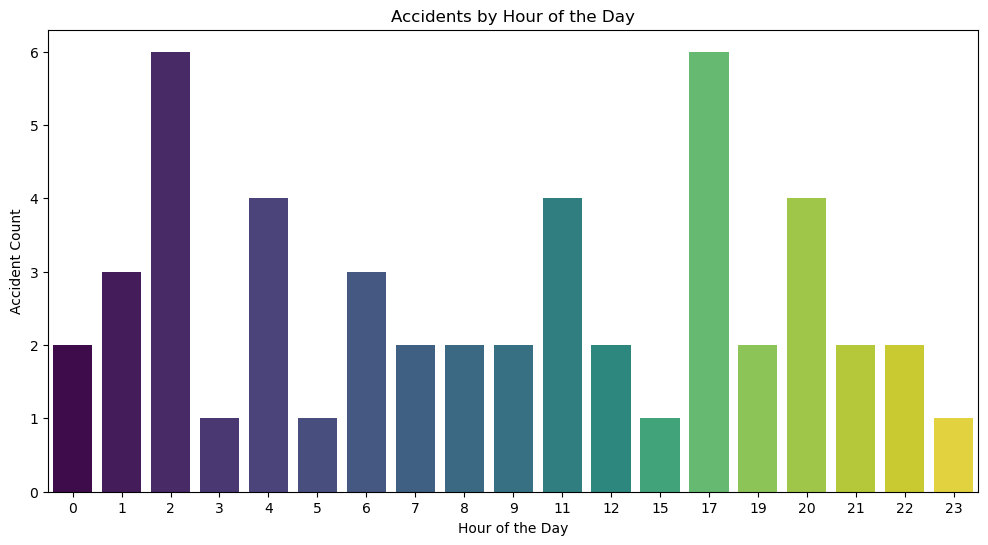

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x=df['Hour'], hue=df['Hour'], legend=False, palette="viridis")

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Count")
plt.title("Accidents by Hour of the Day")
plt.show()


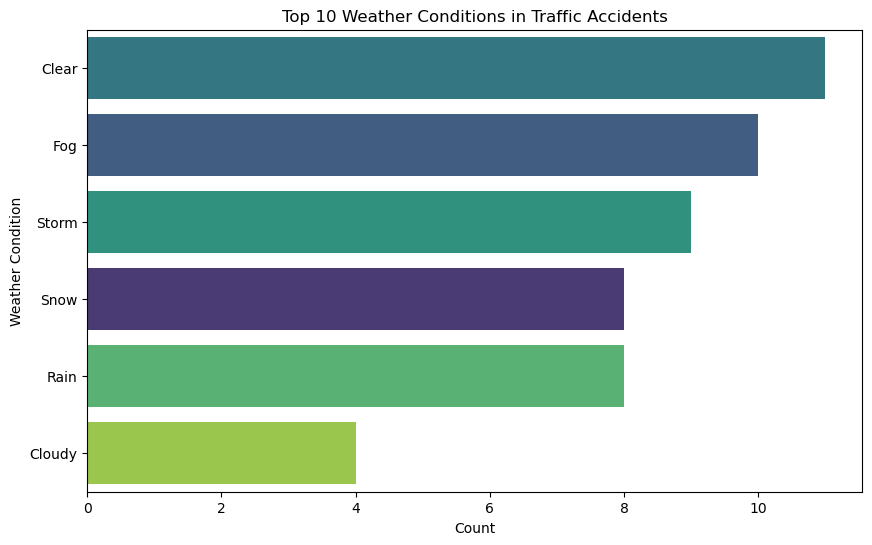

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y=df['Weather_Condition'], order=df['Weather_Condition'].value_counts().index[:10], 
              hue=df['Weather_Condition'], legend=False, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.title("Top 10 Weather Conditions in Traffic Accidents")
plt.show()

In [13]:
import folium
from folium.plugins import HeatMap

# Create a map centered around an approximate location
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

# Add accident data as a heatmap
heat_data = list(zip(df['Latitude'], df['Longitude']))
HeatMap(heat_data[:1000], radius=8).add_to(m)  # Limit to 1000 points for performance

# Show map
m

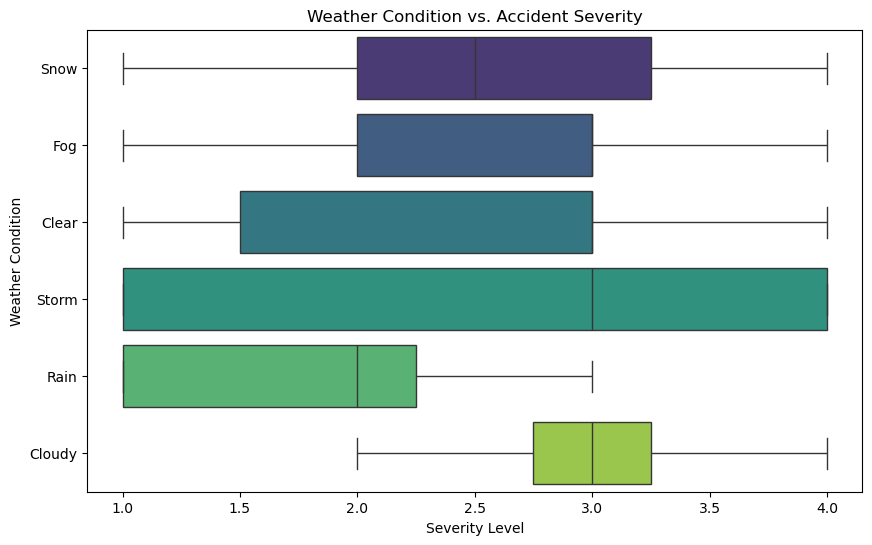

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Weather_Condition', data=df, hue='Weather_Condition', legend=False, palette="viridis")

plt.xlabel("Severity Level")
plt.ylabel("Weather Condition")
plt.title("Weather Condition vs. Accident Severity")
plt.show()
